In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
pd.set_option('display.max_rows',2000)

In [4]:
pd.set_option('display.max_colwidth', 200)

In [5]:
df = pd.read_csv('execution_database.csv')
df.head()

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
2,01/08/1997,Paul Ruiz,49,m,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan
3,01/08/1997,Earl Van Denton,47,m,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada
4,01/06/1994,Keith Wells,31,m,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada


## Idea & Work done
Among countries applying capital punishment worldwide, US is the only Western country which keeps authorizing and applying the death penalty. Claims and predictions about the upcoming “death of death penalty” have been published (http://time.com/deathpenalty/), but it doesn’t seem to be proven real. This is an edgy human-right topic, which currently happens to be in news because of the outset of a trial over Tennessee’s new lethal injection procedure (https://apnews.com/4db89b7b443942fabcd2d420b81c85c1/).

To explore death penalty in US overtime, I searched online and I found an execution database provided and published by the “Death Penalty Information Center” (https://deathpenaltyinfo.org/views-executions), including data for executions from 1977 onwards. 

#### My cleaning and transforming work basically includes the following:

-Extracting year from each date of execution provided in a given column “Date”

-Creating a new column for the year of each execution

-Creating a new column for the decade which year values correspond to

-Replacing gender abbreviations with new gender values in a given column “Sex”, which refers to the gender of prisoners executed

-Replacing states and region abbreviations in new columns created for state and regions names respectively

-Extracting number of victims per case and save it to a new column 

-Recreating dataframes in order to get numeric data to plot, when needed


#### After that, I did some analysis and some graphics in order to discover:

-Most active states in terms of applying death penalty

-Age of executed prisoners

-Most common methods of death penalty used 

-How all of the above have been changing during the years


# Findings

Texas, Virginia and Oklahoma are the US states which mostly apply the death penalty; specifically, Texas seems to be historically the top state applying the capital punishment, counting 552 executions out of 1477 in total (37.4%). Between the years 2000 and 2010, executions seem to increase in comparison to '90s, before decreasing again from 2010 onwards. Prisoners probably increase their living days, since mean age keeps being greater than in the past: In '10s, prisoners’ mean age is the greatest one (46.7 years old), while mean age is just 35.5 years old in ’80s. Taking into account the total research sample, mean age is 41.6 years old. In Lousiana, Virginia, Delaware and more, executed prisoners’ mean age is lower than the total average. Lethal injection is the most common method of execution (88.2%), having been developed from 1990 onwards. Before that, electrocution had been the most common method applied, reaching more than 70% of cases in '80s, when lethal injection was used by 42%. Excluding Timothy James McVeigh, who perpetrated the 1995 Oklahoma City bombing, which killed 166 people, 1.08 is the average number of victims per criminal executed.



## “Nice to have” improvements

-Put the project on a website. This will probably make me revise some styling things and work on them using Illustrator.

## Cleaning and Transforming

In [6]:
df.columns = df.columns.str.replace(' / ', '_')

In [7]:
df.columns = df.columns.str.replace('\s+', '_')

In [8]:
df['year'] = df['Date'].str.extract(r"\d+/\d+/(\d+)", re.IGNORECASE)
#df['year']

In [9]:
df.dtypes

Date                          object
Name                          object
Age                            int64
Sex                           object
Race                          object
Number_Race_Sex_of_Victims    object
State                         object
Region                        object
Method                        object
Juvenile                      object
Federal                       object
Volunteer                     object
Foreign_National              object
County                        object
year                          object
dtype: object

In [10]:
df['year'] = df.year.fillna(0).astype(int)

In [11]:
def get_decades(row):
    if row['year'] >= int(1970) and row['year'] <int(1980):
        val='1970s'
    elif row['year'] >= int(1980) and row['year'] <int(1990):
        val='1980s'
    elif row['year'] >= int(1990) and row['year'] <int(2000):
        val='1990s'
    elif row['year'] >= int(2000) and row['year'] <int(2010):
        val='2000s'
    elif row['year'] >= int(2010):
        val='2010s'
    else:
        val='unknown year'
    return val

In [12]:
df['decade'] = df.apply(get_decades,axis = 1)

In [13]:
df['Sex'].replace('m','Male',inplace=True)
df['Sex'].replace('f','Female',inplace=True)

In [14]:
df = df.rename(columns={'State': 'State_Abbreviations'})
                       #'Region':'Region_Abbreviations'})

In [15]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,1980s
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,1980s
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,1990s
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,1990s
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,1990s


In [16]:
df['State'] = df.State_Abbreviations.replace(
    {'SC': "South Carolina",
    'AR': "Arkansas",
    'ID': "Idaho",
    'VA': "Virginia",
    'TX': 'Texas',
    'WA': 'Washington',
    'LA': 'Lousiana',
    'MO': 'Missouri',
    'OK': 'Oklahoma',
    'GA': 'Georgia',
    'FL': 'Florida',
    'CA': 'California',
     'AZ': 'Arizona',
     'OH': 'Ohio',
     'AL': 'Alabama',
     'IN': 'Indiana',
     'NC': 'North Carolina',
     'DE': 'Delaware',
     'IL': 'Ilinois',
     'PA': 'Pennsylvania',
     'MT': 'Montana',
     'MS': 'Mississippi',
     'NV': 'Nevada',
     'UT': 'Utah',
     'TN': 'Tennessee',
     'MD': 'Maryland',
     'KY': 'Kentacky',
     'SD': 'South Dakota',
     'NE': 'Nebraska',
     'OR': 'Oregon',
     'CO': 'Colorado',
     'CT': 'Connecticut',
     'NM': 'New Mexico',
     'WY': 'Wyoming',
     'FE': 'FE'
})

In [17]:
df = df.rename(columns={'Region':'Region_Abbreviations'})

In [18]:
df['Region'] = df.Region_Abbreviations.replace(
    {'S': "South",
    'W': "West",
    'N': "Northeast",
    'M': "Midwest"})

In [19]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,1980s,South Carolina,South
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,1980s,South Carolina,South
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,1990s,Arkansas,South
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,1990s,Arkansas,South
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,1990s,Idaho,West


In [20]:
df.to_csv("executions_kelly.csv", index=False)

## Analysis and graphics

### Graph 1: Most active states in death penalty use (1.1 - rejected)

In [21]:
df.State.count()

1477

In [22]:
df.State.value_counts()

Texas             552
Virginia          113
Oklahoma          112
Florida            96
Missouri           88
Georgia            72
Alabama            63
Ohio               55
North Carolina     43
South Carolina     43
Arizona            37
Arkansas           31
Lousiana           28
Mississippi        21
Indiana            20
Delaware           16
California         13
Nevada             12
Ilinois            12
Utah                7
Tennessee           6
Washington          5
Maryland            5
Pennsylvania        3
Kentacky            3
South Dakota        3
Idaho               3
Montana             3
FE                  3
Nebraska            3
Oregon              2
Wyoming             1
Connecticut         1
New Mexico          1
Colorado            1
Name: State, dtype: int64

In [23]:
round(df.State.value_counts(normalize=True)*100,1).head(10)

Texas             37.4
Virginia           7.7
Oklahoma           7.6
Florida            6.5
Missouri           6.0
Georgia            4.9
Alabama            4.3
Ohio               3.7
North Carolina     2.9
South Carolina     2.9
Name: State, dtype: float64

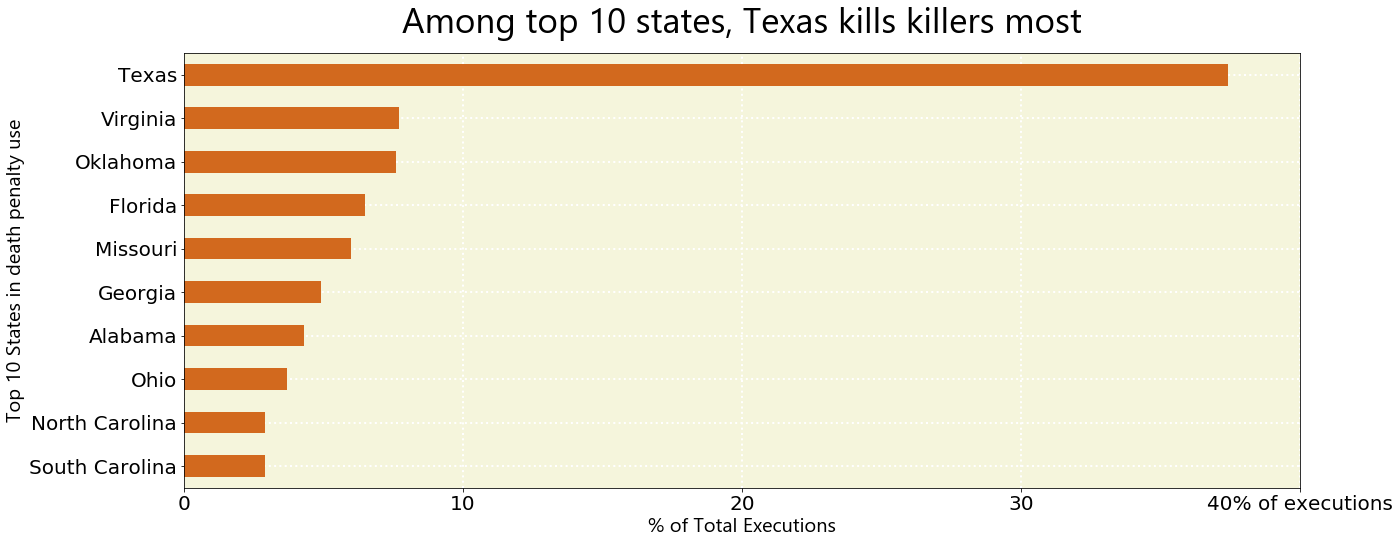

In [25]:
states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
graph = states.tail(10).plot(kind='barh',figsize=(20,8), color='chocolate')

graph.set_title('Among top 10 states, Texas kills killers most',fontsize=35,fontname="Nirmala UI",pad=20)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,10,20,30,40])
graph.set_xticklabels(['0','10','20','30','40% of executions'])

graph.set_xlabel('% of Total Executions',fontsize=20,fontname="Nirmala UI")
graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.grid(True)
graph.set_axisbelow(True)
graph.set_facecolor('beige')
graph.grid(True,axis='both',color='white',linestyle=':',linewidth=2)

#graph.yaxis.label.set_visible(True)

### Graph 1: Most active states in death penalty use (1.2) - selected

In [26]:
states_pct = round(df.State.value_counts(ascending=True,normalize=True)*100,1).reset_index().tail(10)
states_pct

,index,State
25,South Carolina,2.9
26,North Carolina,2.9
27,Ohio,3.7
28,Alabama,4.3
29,Georgia,4.9
30,Missouri,6.0
31,Florida,6.5
32,Oklahoma,7.6
33,Virginia,7.7
34,Texas,37.4


In [27]:
states_pct = states_pct.rename(columns={'index': 'states','State':'percentage'})
states_pct

,states,percentage
25,South Carolina,2.9
26,North Carolina,2.9
27,Ohio,3.7
28,Alabama,4.3
29,Georgia,4.9
30,Missouri,6.0
31,Florida,6.5
32,Oklahoma,7.6
33,Virginia,7.7
34,Texas,37.4


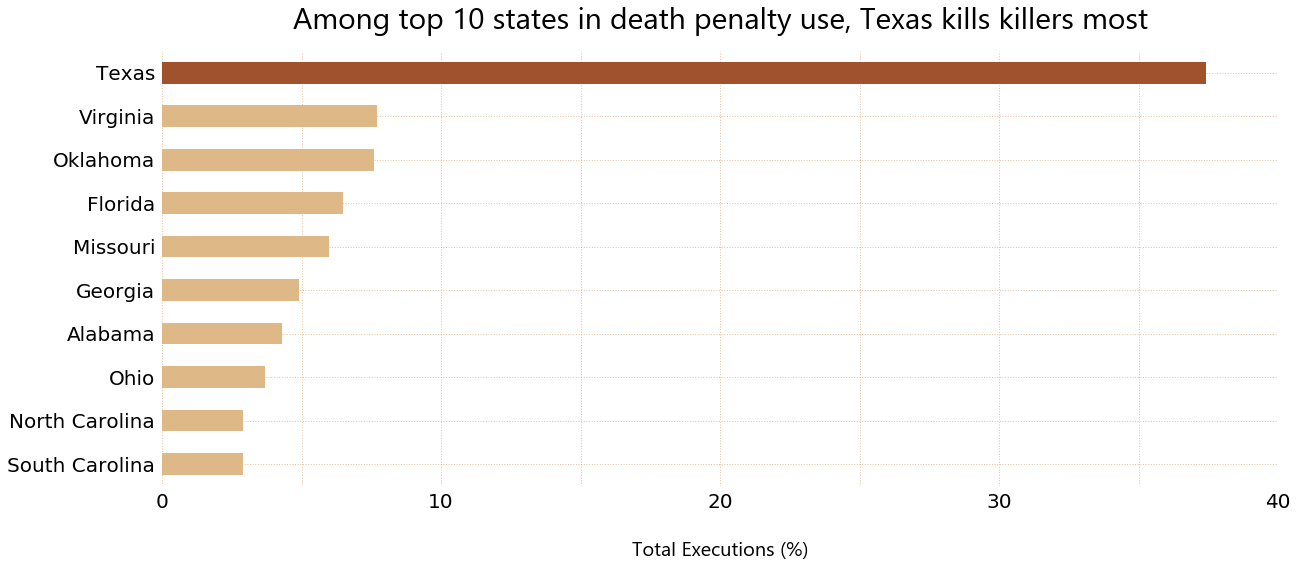

In [28]:
def color(state):
    if state == 'Texas':
        return 'sienna'
    else:
        return 'burlywood'
    
bar_colors = [color(state) for state in states_pct.states]

states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
graph = states.tail(10).plot(kind='barh',figsize=(20,8), color=bar_colors)

graph.set_title('Among top 10 states in death penalty use, Texas kills killers most',fontsize=30,fontname="Nirmala UI",pad=22)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,5,10,15,20,25,30,35,40])
graph.set_xticklabels(['0','','10','','20','','30','','40'])

#graph.set_xlabel('Total Executions (%)',fontsize=20,fontname="Nirmala UI")
#graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.spines['top'].set_visible(False)
graph.spines['left'].set_visible(False)
graph.spines['bottom'].set_visible(False)
graph.spines['right'].set_visible(False)

graph.grid(True)
graph.set_axisbelow(True)
graph.set_facecolor('white')
graph.grid(True,axis='both',color='peru',linestyle=':',linewidth=1)

graph.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)

plt.xlabel('Total Executions (%)',fontsize=20,fontname="Nirmala UI",labelpad=30)


plt.savefig('top-10-states.png')
plt.show()

#graph.axes.labelpad: 4.0

#lon.set_axislabel('Galactic Longitude', minpad=0.3)
#lat.set_axislabel('Galactic Latitude', minpad=-0.4)

#graph.tick_params(axis='both', which='major', pad=20)

#graph.yaxis.label.set_visible(True)

### Graph 1: Most active states in death penalty use (1.3) - rejected

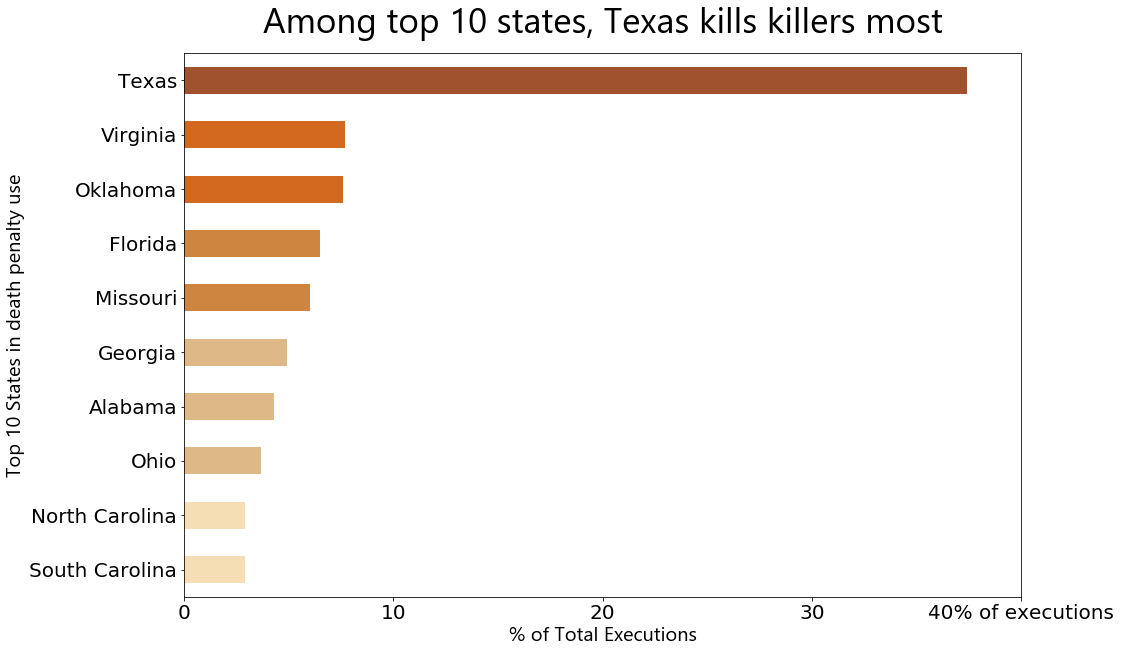

In [29]:
#states = df.State.value_counts(normalize=True).head(10).plot(kind='bar',figsize=(30,10))
def get_color(state):
    if state == 'Texas':
        return 'sienna'
    elif state == 'Virginia' or state == 'Oklahoma':
        return 'chocolate'
    elif state == 'Florida' or state == 'Missouri':
        return 'peru'
    elif state == 'Georgia' or state == 'Alabama' or state =='Ohio':
        return 'burlywood'
    else:
        return 'wheat'
    
bar_colors = [get_color(state) for state in states_pct.states]

graph = states_pct.sort_index().plot(x='states', y='percentage', kind='barh', color=bar_colors, figsize=(15,10), legend=False)

#bar_colors = [get_color(state) for state in states_pct]

#states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
#graph = states.tail(10).plot(kind='barh',figsize=(20,8), color=bar_colors)

graph.set_title('Among top 10 states, Texas kills killers most',fontsize=35,fontname="Nirmala UI",pad=20)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,10,20,30,40])
graph.set_xticklabels(['0','10','20','30','40% of executions'])

graph.set_xlabel('% of Total Executions',fontsize=20,fontname="Nirmala UI")
graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.grid(False)
graph.set_axisbelow(True)
graph.set_facecolor('white')
#graph.set_facecolor('beige')
#graph.grid(True,axis='both',color='white',linestyle=':',linewidth=2)

### Graph 2: What is the prisoners' average age at the time of execution? How does each state perform on that? 

### Is each state above or below the average? 

In [30]:
round(df.Age.mean(),1)

41.6

In [31]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=True).head(5)

State
Lousiana    34.9
Virginia    35.9
Delaware    37.1
Utah        37.7
Texas       39.5
Name: Age, dtype: float64

In [32]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=False).head(5)

State
Oregon          56.0
Colorado        53.0
Tennessee       50.2
California      49.8
Pennsylvania    48.7
Name: Age, dtype: float64

In [33]:
ages = round(df.groupby('State').Age.mean(),1).reset_index(name='mean_age').sort_values(by='mean_age',ascending=False)
ages

,State,mean_age
25,Oregon,56.0
4,Colorado,53.0
29,Tennessee,50.2
3,California,49.8
26,Pennsylvania,48.7
1,Arizona,47.2
8,Florida,46.7
10,Idaho,46.0
9,Georgia,45.9
19,Nebraska,45.7


### selected version

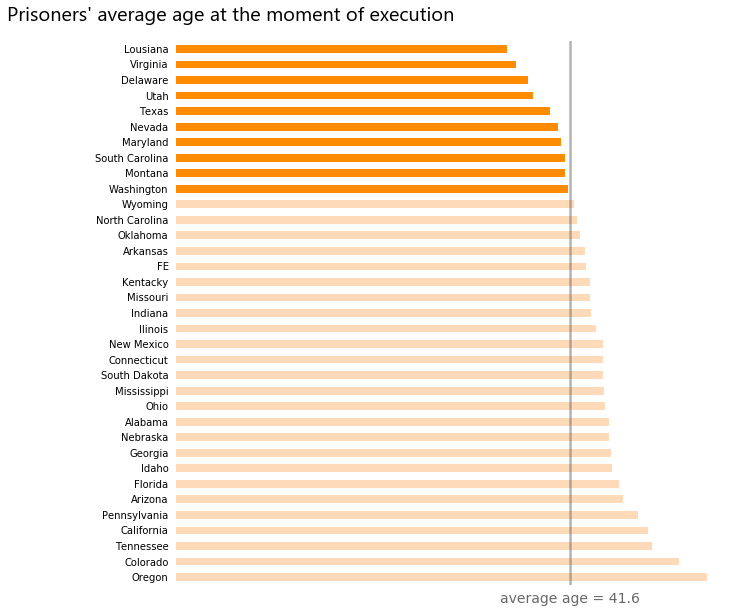

In [34]:
def color(mean_age):
    if mean_age < 41.6:
        return 'darkorange'
    else:
        return 'peachpuff'

bar_colors = [color(mean_age) for mean_age in ages.mean_age]

# def line(mean_age):
#     if 34.9 <= mean_age <= 41.6:
#         return ax.set_xticksgrid([34.9,41.6])
# #     elif mean_age < 41.6 or mean_age >4:
# #         return ax.grid(True,axis='x',color='grey',linestyle=':',linewidth=1)

# # line_styles = [line(mean_age) for mean_age in ages.mean_age]

ax = ages.plot(x='State', y='mean_age', kind='barh', color=bar_colors, figsize=(10,10), legend=False)

ax.set_title("Prisoners' average age at the moment of execution",fontsize=20,fontname="Nirmala UI",pad=20,ha='right')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=10)
#ax.set_xlabel('Average age at the moment of execution',fontsize=15,fontname="Nirmala UI")
#ax.set_ylabel('',fontsize=15,fontname="Nirmala UI")

ax.set_xticks([41.6])
ax.set_xticklabels(['average age = 41.6'],color='dimgrey')

# ax.set_xticks([35,40,45,50,55,60])
# ax.set_xticklabels(['35','40','45','50','55','60 years old'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)
#ax.set_facecolor('lightgrey')

ax.grid(True,axis='x',color='dimgrey',linewidth=2.5)
#ax.grid(True,axis='y',color='dimgrey',linewidth=1.5)
#ax.set_axisbelow(True)
#ax.set_xlim(0,60)

ax.yaxis.label.set_visible(False)

### rejected draft version

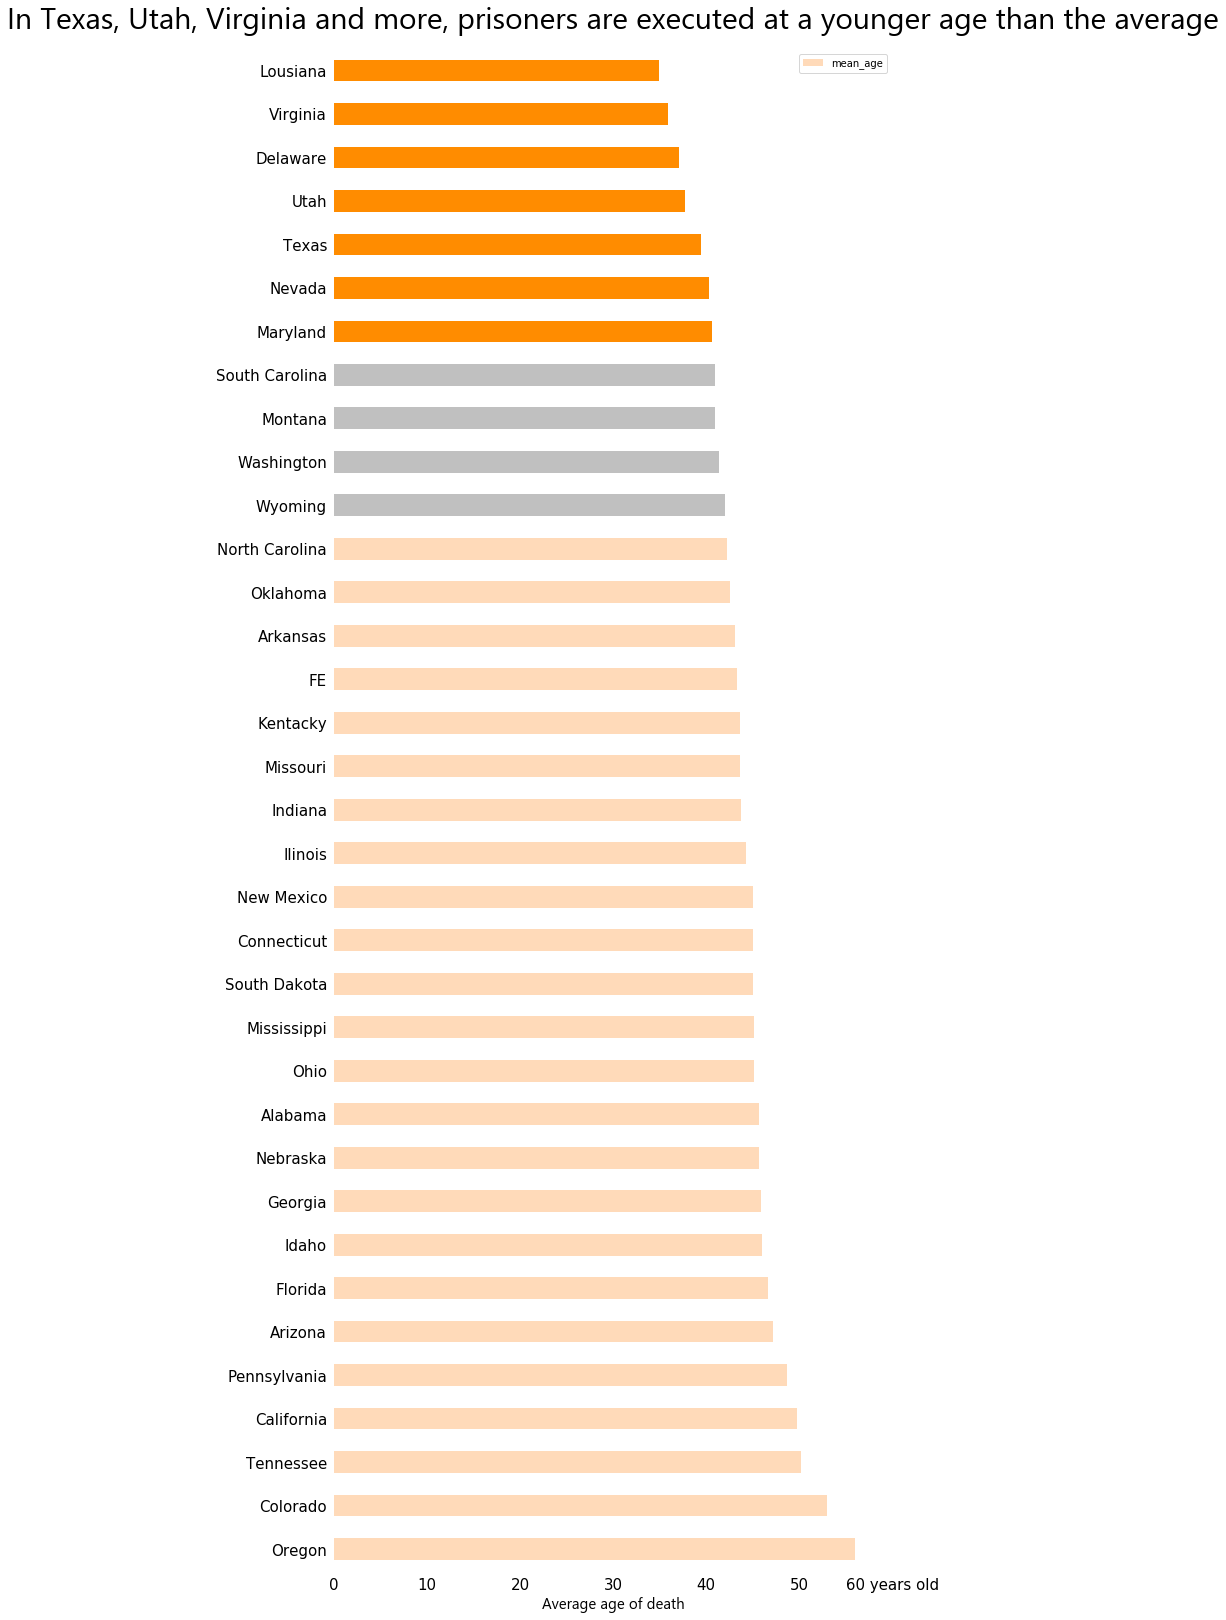

In [35]:
def get_color(mean_age):
    if mean_age < 41:
        return 'darkorange'
    elif mean_age >=41 and mean_age<=42:
        return 'silver'
    else:
        return 'peachpuff'

bar_colors = [get_color(mean_age) for mean_age in ages.mean_age]

ax = ages.plot(x='State', y='mean_age', kind='barh', color=bar_colors, figsize=(10,28))

ax.set_title('In Texas, Utah, Virginia and more, prisoners are executed at a younger age than the average',fontsize=30,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Average age of death',fontsize=15,fontname="Nirmala UI")
#ax.set_ylabel('',fontsize=15,fontname="Nirmala UI")

ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['0','10', '20','30','40','50','60 years old'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)
#ax.set_facecolor('lightgrey')

#ax.grid(True,axis='x',color='white',linestyle=':',linewidth=1)
#ax.set_axisbelow(True)
#ax.set_xlim(0,60)

ax.yaxis.label.set_visible(False)

### Graph 3.1: How much death penalty has been being used overtime?

In [36]:
df.decade.value_counts()

2000s           590
1990s           478
2010s           289
1980s           117
1970s             3
unknown year      2
Name: decade, dtype: int64

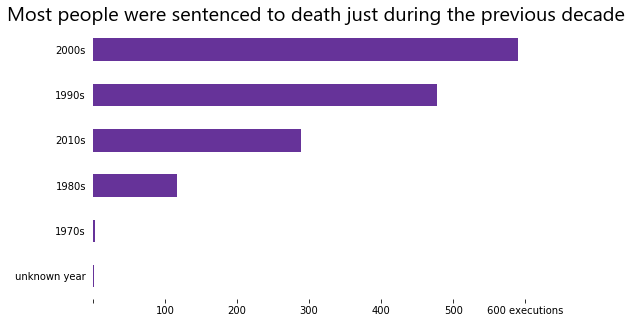

In [37]:
decades = df.decade.value_counts(ascending=True).plot(x='country',kind='barh', figsize=(8,5), color='rebeccapurple')

decades.set_xticklabels(['','100','200','300','400','500','600 executions'])
decades.tick_params(left=False)

decades.spines['top'].set_visible(False)
decades.spines['left'].set_visible(False)
decades.spines['bottom'].set_visible(False)
decades.spines['right'].set_visible(False)

decades.set_title('Most people were sentenced to death just during the previous decade')
decades.title.set_fontsize(20)
decades.title.set_fontname("Nirmala UI")


In [38]:
df[df.decade=='unknown year']

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region
1450,NaN,Marcel Williams,0,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,NaN,0,unknown year,NaN,NaN
1465,NaN,Ruben Cardenas,0,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,NaN,0,unknown year,NaN,NaN


In [39]:
colors = ['darksalmon', 'black', 'yellow', 'blue', 'maroon']

### Graph 3.2: How much death penalty has been being used overtime? (same graph in another way)

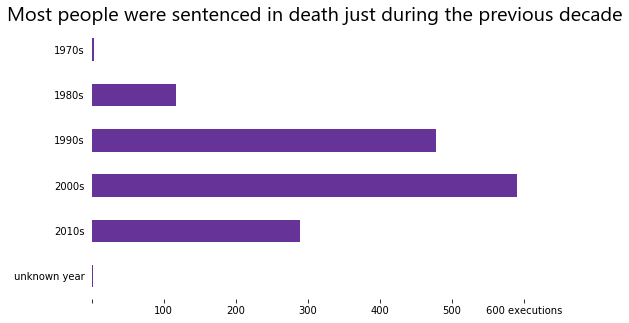

In [40]:
decades = df.decade.value_counts().sort_index(ascending=False).plot(x='country',kind='barh', figsize=(8,5), color='rebeccapurple')

decades.set_xticklabels(['','100','200','300','400','500','600 executions'])

decades.spines['top'].set_visible(False)
decades.spines['left'].set_visible(False)
decades.spines['bottom'].set_visible(False)
decades.spines['right'].set_visible(False)

decades.tick_params(left=False)

decades.set_title('Most people were sentenced in death just during the previous decade')
decades.title.set_fontsize(20)
decades.title.set_fontname("Nirmala UI")

In [41]:
round(df.Age.mean(),1)

41.6

In [42]:
round(df.groupby('decade').Age.mean(),1)

decade
1970s           37.3
1980s           35.5
1990s           40.1
2000s           41.8
2010s           46.7
unknown year     0.0
Name: Age, dtype: float64

In [43]:
df.Race.value_counts()

White              821
Black              507
Latino             124
Native American     16
Asian                7
Other                2
Name: Race, dtype: int64

In [44]:
df.groupby('decade').Race.value_counts()

decade  Race           
1970s   White                3
1980s   White               61
        Black               49
        Latino               7
1990s   White              270
        Black              162
        Latino              33
        Native American      8
        Asian                5
2000s   White              331
        Black              202
        Latino              46
        Native American      7
        Asian                2
        Other                2
2010s   White              156
        Black               94
        Latino              38
        Native American      1
Name: Race, dtype: int64

In [45]:
round(df.groupby('decade').Race.value_counts(normalize=True)*100,1)

decade  Race           
1970s   White              100.0
1980s   White               52.1
        Black               41.9
        Latino               6.0
1990s   White               56.5
        Black               33.9
        Latino               6.9
        Native American      1.7
        Asian                1.0
2000s   White               56.1
        Black               34.2
        Latino               7.8
        Native American      1.2
        Asian                0.3
        Other                0.3
2010s   White               54.0
        Black               32.5
        Latino              13.1
        Native American      0.3
Name: Race, dtype: float64

In [46]:
top_by_race = df.groupby('State').Race.value_counts().sort_values(ascending=False).head(3).unstack().reset_index().fillna(0)
top_by_race

Race,State,White,Black,Latino
0,Texas,242,201,105


In [47]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,1980s,South Carolina,South
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,1980s,South Carolina,South
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,1990s,Arkansas,South
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,1990s,Arkansas,South
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,1990s,Idaho,West


### Exploring methods of execution (Graphs 4 & 5)

In [48]:
df.Method.value_counts()

Lethal Injection    1302
Electrocution        158
Gas Chamber           11
Hanging                3
Firing Squad           3
Name: Method, dtype: int64

In [49]:
round(df.Method.value_counts(normalize=True)*100,1)

Lethal Injection    88.2
Electrocution       10.7
Gas Chamber          0.7
Hanging              0.2
Firing Squad         0.2
Name: Method, dtype: float64

In [50]:
by_method = df.groupby('decade').Method.value_counts().sort_index(ascending=False).unstack().reset_index().fillna(0)
#by_method = df.groupby('decade').Method.value_counts(dropna=False)
#sort_values(ascending=False)
by_method

Method,decade,Electrocution,Firing Squad,Gas Chamber,Hanging,Lethal Injection
0,2010s,2.0,1.0,0.0,0.0,286.0
1,2000s,12.0,0.0,0.0,0.0,578.0
2,1990s,72.0,1.0,6.0,3.0,396.0
3,1980s,71.0,0.0,4.0,0.0,42.0
4,1970s,1.0,1.0,1.0,0.0,0.0


## Graph 4: What is the most common method used overtime?

In [51]:
colors = ['darksalmon', 'blue','black', 'yellow', 'maroon']

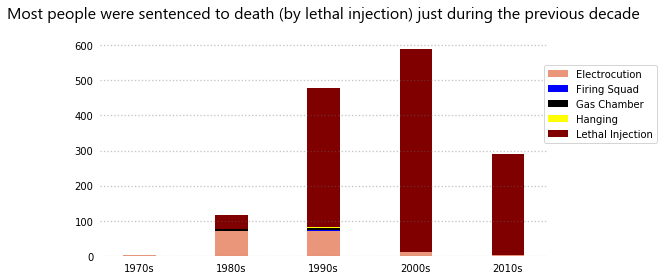

In [52]:
#my_legend = ['one', 'two', 'three', 'four', 'five']

ax = by_method.sort_index(ascending=False).plot(kind='bar',x='decade',stacked=True, color=colors,figsize=(8,4),width=0.35,rot=0)
#sort_values(by='decade')
ax.set_title('Most people were sentenced to death (by lethal injection) just during the previous decade',fontsize=16,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=10)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
#ax.set_xlabel('Different decades that death penalty is used',fontsize=20,fontname="Nirmala UI")
#ax.set_ylabel('Number of executions',fontsize=20,fontname='Nirmala UI')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xticks([1970,1980,1990,2000,2010])
ax.set_xticklabels(['1970s','1980s','1990s','2000s','2010s'])

ax.legend(loc='lower right',
          bbox_to_anchor=(1.1, 0.5),
          bbox_transform=plt.gcf().transFigure)

ax.grid(True,axis='y',color='dimgrey',linestyle=':',linewidth=1.3, alpha=0.4)

ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

#plt.legend(my_legend, loc=0)

## Graph 5: What is the most common method used in each state?

In [53]:
colors = ['darksalmon', 'black', 'yellow', 'blue', 'maroon']

In [54]:
method = df.groupby('State').Method.value_counts().unstack().reset_index().fillna(0)
method.head()

Method,State,Electrocution,Firing Squad,Gas Chamber,Hanging,Lethal Injection
0,Alabama,24.0,0.0,0.0,0.0,39.0
1,Arizona,0.0,0.0,2.0,0.0,35.0
2,Arkansas,1.0,0.0,0.0,0.0,30.0
3,California,0.0,0.0,2.0,0.0,11.0
4,Colorado,0.0,0.0,0.0,0.0,1.0


In [55]:
method.columns = method.columns.str.replace('\s+', '_')
method.head()

Method,State,Electrocution,Firing_Squad,Gas_Chamber,Hanging,Lethal_Injection
0,Alabama,24.0,0.0,0.0,0.0,39.0
1,Arizona,0.0,0.0,2.0,0.0,35.0
2,Arkansas,1.0,0.0,0.0,0.0,30.0
3,California,0.0,0.0,2.0,0.0,11.0
4,Colorado,0.0,0.0,0.0,0.0,1.0


In [56]:
method1= method[['State','Electrocution','Lethal_Injection']]
method1.head()

Method,State,Electrocution,Lethal_Injection
0,Alabama,24.0,39.0
1,Arizona,0.0,35.0
2,Arkansas,1.0,30.0
3,California,0.0,11.0
4,Colorado,0.0,1.0


In [57]:
method2= method[['State','Firing_Squad','Gas_Chamber','Hanging']]
#method2.head()
method2['Other'] = method2.sum(axis=1)
method2.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Method,State,Firing_Squad,Gas_Chamber,Hanging,Other
0,Alabama,0.0,0.0,0.0,0.0
1,Arizona,0.0,2.0,0.0,2.0
2,Arkansas,0.0,0.0,0.0,0.0
3,California,0.0,2.0,0.0,2.0
4,Colorado,0.0,0.0,0.0,0.0


In [58]:
method_state = pd.merge(method1, method2, on='State')
method_state.head()

Method,State,Electrocution,Lethal_Injection,Firing_Squad,Gas_Chamber,Hanging,Other
0,Alabama,24.0,39.0,0.0,0.0,0.0,0.0
1,Arizona,0.0,35.0,0.0,2.0,0.0,2.0
2,Arkansas,1.0,30.0,0.0,0.0,0.0,0.0
3,California,0.0,11.0,0.0,2.0,0.0,2.0
4,Colorado,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
method_state.drop(columns='Firing_Squad',inplace=True)
method_state.drop(columns='Gas_Chamber',inplace=True)
method_state.drop(columns='Hanging',inplace=True)
method_state.head()

Method,State,Electrocution,Lethal_Injection,Other
0,Alabama,24.0,39.0,0.0
1,Arizona,0.0,35.0,2.0
2,Arkansas,1.0,30.0,0.0
3,California,0.0,11.0,2.0
4,Colorado,0.0,1.0,0.0


In [60]:
method_state.columns = method_state.columns.str.replace('_', ' ')

In [61]:
#method_state = method_state.groupby('State').Method.value_counts().unstack().reset_index().fillna(0)
method_state['total'] = method_state.sum(axis=1)
method_state.head()

Method,State,Electrocution,Lethal Injection,Other,total
0,Alabama,24.0,39.0,0.0,63.0
1,Arizona,0.0,35.0,2.0,37.0
2,Arkansas,1.0,30.0,0.0,31.0
3,California,0.0,11.0,2.0,13.0
4,Colorado,0.0,1.0,0.0,1.0


In [62]:
method_state.sort_values(by='total',inplace=True)
method_state.head()

Method,State,Electrocution,Lethal Injection,Other,total
34,Wyoming,0.0,1.0,0.0,1.0
21,New Mexico,0.0,1.0,0.0,1.0
4,Colorado,0.0,1.0,0.0,1.0
5,Connecticut,0.0,1.0,0.0,1.0
25,Oregon,0.0,2.0,0.0,2.0


In [63]:
method_state.drop(columns='total',inplace=True)
method_state.head()

Method,State,Electrocution,Lethal Injection,Other
34,Wyoming,0.0,1.0,0.0
21,New Mexico,0.0,1.0,0.0
4,Colorado,0.0,1.0,0.0
5,Connecticut,0.0,1.0,0.0
25,Oregon,0.0,2.0,0.0


In [64]:
colors_2 = ['darksalmon', 'maroon','yellow']

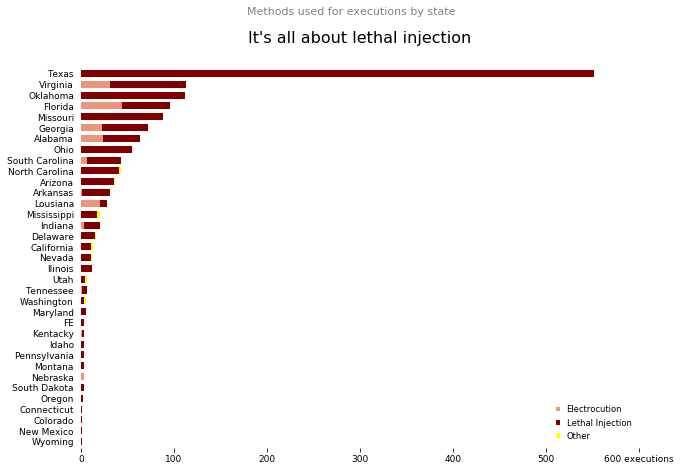

In [65]:
#ax = method_state.sort_values(by='total').plot(kind='barh',x='State',stacked=True, color=colors,figsize=(10,15))
ax = method_state.plot(kind='barh',x='State',stacked=True, color=colors_2,figsize=(10,7),width=0.65)

plt.rcdefaults()
plt.rcParams.update({'font.size':10,
     'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5})
    
    
#ax.set_title("It's all about lethal injection",fontsize=25,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=9)
#ax.set_xlabel('Number of executions',fontsize=20,fontname="Nirmala UI")
ax.set_ylabel('US states',fontsize=20,fontname='Nirmala UI')
ax.yaxis.label.set_visible(False)

ax.set_xticks([0,100,200,300,400,500,600])
ax.set_xticklabels(['0','100', '200','300','400','500','600'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels(['0','100','200','300','400','500','600 executions'])

ax.tick_params(left=False)

ax.yaxis.label.set_visible(False)

plt.legend(loc=4)

title_string = "Methods used for executions by state"
subtitle_string = "It's all about lethal injection"
plt.suptitle(title_string, y=1, x=0.5, fontsize=11,color='grey')
plt.title(subtitle_string, y=1.05, x=0.5, fontsize=16,color='black')

plt.savefig('legend_test.png')
plt.show()

### Some work to get number of each prisoner's victims

In [66]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,1980s,South Carolina,South
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,1980s,South Carolina,South
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,1990s,Arkansas,South
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,1990s,Arkansas,South
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,1990s,Idaho,West


In [67]:
df.Number_Race_Sex_of_Victims

0                                      1 White Male(s)1 White Female(s)
1                                      1 White Male(s)1 White Female(s)
2                                                       2 White Male(s)
3                                                       2 White Male(s)
4                                      1 White Male(s)1 White Female(s)
5                                                       2 White Male(s)
6                                                     2 White Female(s)
7                                                       3 White Male(s)
8                                      2 White Male(s)2 White Female(s)
9                                      2 White Male(s)2 White Female(s)
10                                                      1 Asian Male(s)
11                                                      1 Black Male(s)
12                                                      1 Black Male(s)
13                                                   1 Latino Fe

In [68]:
df['victims_1'] = df.Number_Race_Sex_of_Victims.str.extract(r"^(\d+)", re.IGNORECASE)
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region,victims_1
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,1980s,South Carolina,South,1
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,1980s,South Carolina,South,1
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,1990s,Arkansas,South,2
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,1990s,Arkansas,South,2
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,1990s,Idaho,West,1


In [69]:
df['victims_2'] = df.Number_Race_Sex_of_Victims.str.extract(r"[)](\d+) \w+", re.IGNORECASE)

In [70]:
df['victims_3'] = df.Number_Race_Sex_of_Victims.str.extract(r"s[)].*[(]s[)](\d+)", re.IGNORECASE)

In [71]:
df['victims_3_more'] = df.Number_Race_Sex_of_Victims.str.extract(r"American (\d+)", re.IGNORECASE)

In [72]:
df['victims_4'] = df.Number_Race_Sex_of_Victims.str.extract(r"Latino (\d+)", re.IGNORECASE)

In [73]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,...,County,year,decade,State,Region,victims_1,victims_2,victims_3,victims_3_more,victims_4
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,...,Richland,1986,1980s,South Carolina,South,1,1,NaN,NaN,NaN
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,...,Richland,1985,1980s,South Carolina,South,1,1,NaN,NaN,NaN
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,...,Logan,1997,1990s,Arkansas,South,2,NaN,NaN,NaN,NaN
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,...,Nevada,1997,1990s,Arkansas,South,2,NaN,NaN,NaN,NaN
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,...,Ada,1994,1990s,Idaho,West,1,1,NaN,NaN,NaN


In [74]:
df = df.fillna(0)
#df
df['victims_1'] = df['victims_1'].astype(int)

In [75]:
df['victims_2'] = df['victims_2'].astype(int)

In [76]:
df['victims_3'] = df['victims_3'].astype(int)

In [77]:
df['victims_3_more'] = df['victims_3_more'].astype(int)

In [78]:
df['victims_4'] = df['victims_4'].astype(int)

In [79]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,...,County,year,decade,State,Region,victims_1,victims_2,victims_3,victims_3_more,victims_4
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,...,Richland,1986,1980s,South Carolina,South,1,1,0,0,0
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,...,Richland,1985,1980s,South Carolina,South,1,1,0,0,0
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,...,Logan,1997,1990s,Arkansas,South,2,0,0,0,0
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,...,Nevada,1997,1990s,Arkansas,South,2,0,0,0,0
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,...,Ada,1994,1990s,Idaho,West,1,1,0,0,0


In [80]:
df['victims'] = df['victims_1']+df['victims_2']+df['victims_3']+df['victims_3_more']+df['victims_4']

In [81]:
df['victims'].dtype

dtype('int32')

In [82]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,...,year,decade,State,Region,victims_1,victims_2,victims_3,victims_3_more,victims_4,victims
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,...,1986,1980s,South Carolina,South,1,1,0,0,0,2
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,...,1985,1980s,South Carolina,South,1,1,0,0,0,2
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,...,1997,1990s,Arkansas,South,2,0,0,0,0,2
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,...,1997,1990s,Arkansas,South,2,0,0,0,0,2
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,...,1994,1990s,Idaho,West,1,1,0,0,0,2


In [83]:
df.Name.count()

1479

In [84]:
df.victims.sum()

2266

In [85]:
2266-166

2100

In [86]:
round(df.victims.sum()/2100,2)

1.08

In [87]:
vict = df[['Name','victims']]

([], <a list of 0 Text xticklabel objects>)

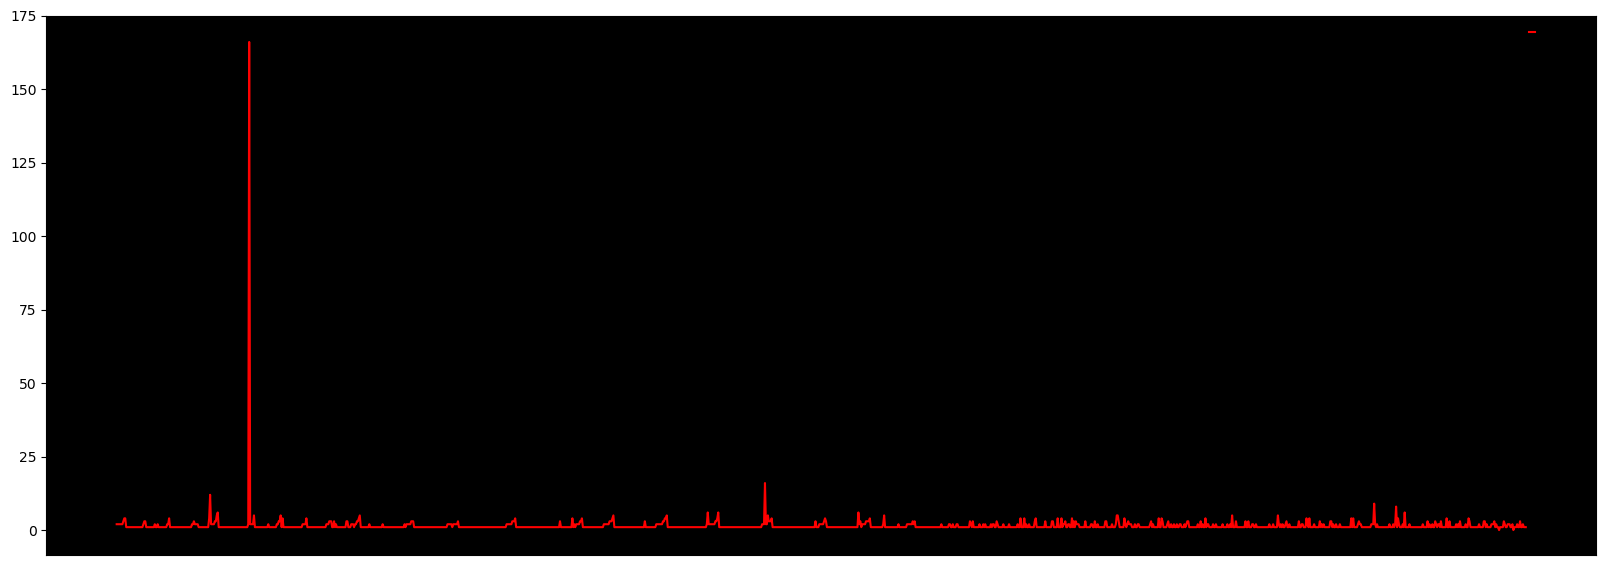

In [88]:
ax = vict.plot(kind='line',figsize=(20,7),color='red',alpha=1)

ax.set_facecolor('black')

ax.set_yticks([0,25,50,75,100,125,150,175])
ax.set_yticklabels(['0','25','50','75','100','125','150','175'])

plt.tick_params(axis='x',which='major',bottom=False)
plt.xticks([])

In [89]:
#df.count()

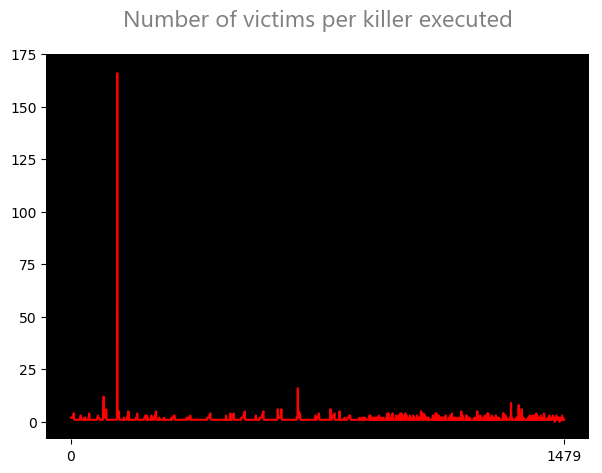

In [90]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size':10,
    'text.color':'grey',
       })

ax = df.victims.plot(figsize=(7,5), color='red')

ax.set_title('Number of victims per killer executed',fontsize=17,fontname="Nirmala UI",pad=20, ha='center')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(axis='x',which='major',bottom=True)
# plt.xticks([])

ax.set_facecolor('black')

ax.set_yticks([0,25,50,75,100,125,150,175])
ax.set_yticklabels(['0','25','50','75','100','125','150','175'])
ax.set_xticks([0,1479])
#ax.set_xtickslabels(['0','1479 convicts are executed'])

# ax.set_xlabel('% of Total Executions',fontsize=10,fontname="Nirmala UI",ha='center')
# ax.set_ylabel('Top 10 States in death penalty use',fontsize=10,fontname="Nirmala UI")

# plt.savefig('victims_test.pdf')
# plt.show()